# <center>Mobile Games: A/B Testing & Player Retention </center>

## Table of Contents

1. **[Project Background](#1)**
2. **[About the Data](#2)**
3. **[Analyzing Player Behavior ](#3)**
4. **[Comparing 1-day Retention](#4)**
5. **[Comparing 7-day Retention](#5)**
6. **[Conclusion](#6)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1. Project Background <a name= '1'></a>

<p><a href="https://www.facebook.com/cookiecatsgame">Cookie Cats</a> is a hugely popular mobile puzzle game developed by <a href="http://tactile.dk">Tactile Entertainment</a>. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. It also features singing cats. Check out this short demo:</p>
<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>
<p>As players progress through the levels of the game, they will <strong>occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress</strong>. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.<p>But where should the gates be placed? Initially the first gate was placed at level 30. <strong>In this project, we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention.</strong> </p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png" alt=""></p>

## Part 2. About the Data  <a name= '2'></a>

### 2.1 Load the AB-test data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Groce/Python/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<p>The data is from 90,189 players that installed the game while the AB-test was running. The variables are:</p>
<ul>
<li><code>userid</code> - a unique number that identifies each player.</li>
<li><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the test group (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - the number of game rounds played by the player during the first week after install
<li><code>retention_1</code> - did the player come back and play 1 day after SEE THE GATE?</li>
<li><code>retention_7</code> - did the player come back and play 7 days after SEE THE GATE?</li>
</ul>
<p>When a player installed the game, he or she was randomly assigned to either <code>gate_30</code> or <code>gate_40</code>. </p>

### 2.2 Check missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


Luckily, there is no missing value in this dataset.
### 2.3 Count the number of players in each group

In [ ]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


<p>When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40. The number of players is roughly the same in the control and test group, nice!

# bonus point = eda- correlation + 3 method -> draw similar conclusion

In [ ]:
df.isnull().sum()

,0
userid,0
version,0
sum_gamerounds,0
retention_1,0
retention_7,0


In [ ]:
df['version'].value_counts()

,count
version,
gate_40,45489
gate_30,44700


Text(0.5, 1.0, 'Day 1 Retention by Version')

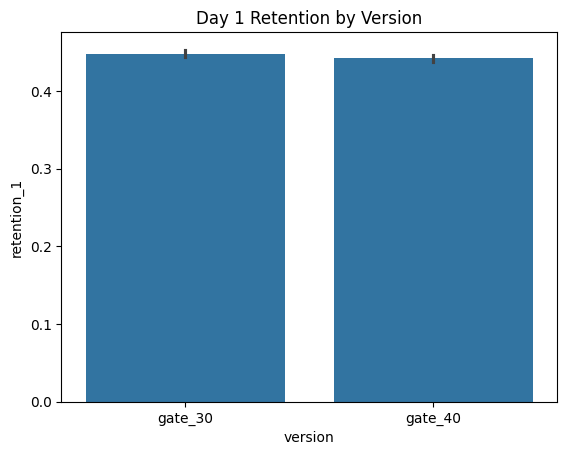

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data=df, x='version', y='retention_1')
plt.title("Day 1 Retention by Version")

Text(0.5, 1.0, 'Game Rounds vs Retention_1')

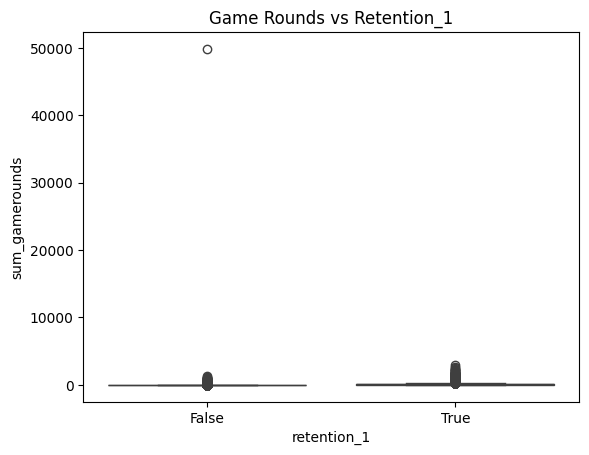

In [ ]:
sns.boxplot(x='retention_1', y='sum_gamerounds', data=df)
plt.title("Game Rounds vs Retention_1")

Text(0.5, 1.0, 'Game Rounds vs Retention_7')

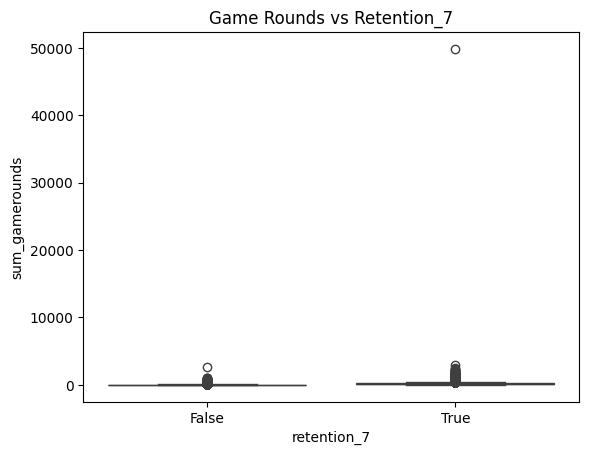

In [ ]:
sns.boxplot(x='retention_7', y='sum_gamerounds', data=df)
plt.title("Game Rounds vs Retention_7")

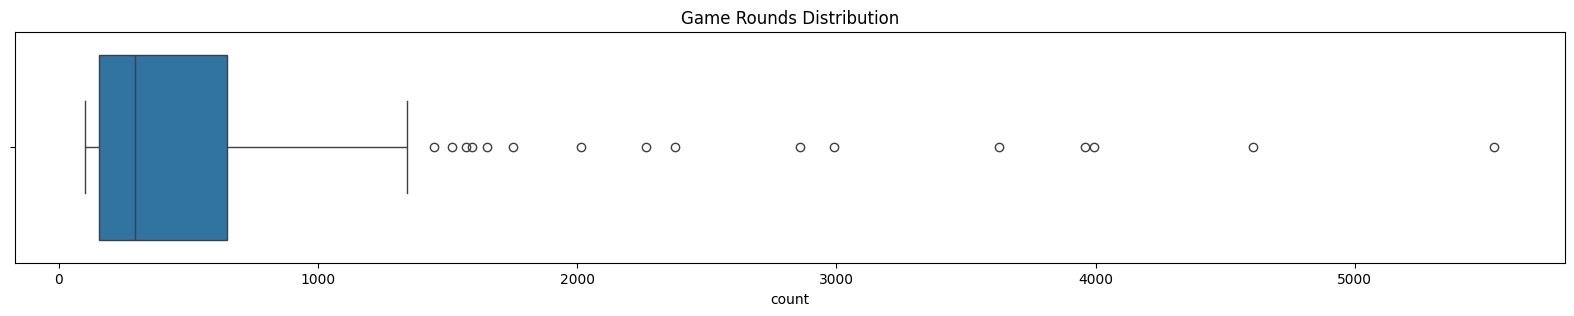

In [ ]:
game_rounds_distribution = df['sum_gamerounds'].value_counts()
plt.figure(figsize=(20, 3))
sns.boxplot(x = game_rounds_distribution[game_rounds_distribution > 100])
plt.title("Game Rounds Distribution")
plt.show()

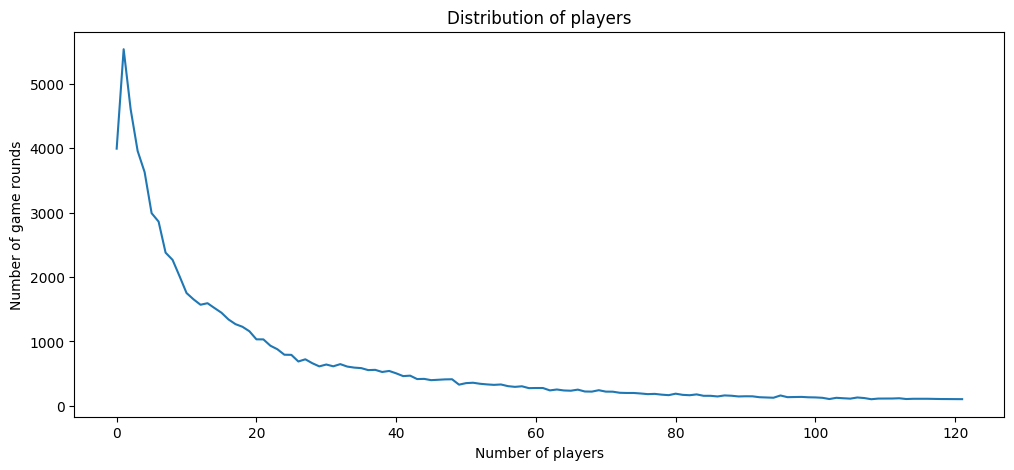

In [ ]:
plt.figure(figsize = (12,5))
plt.xlabel('Number of players')
plt.ylabel('Number of game rounds')
plt.title('Distribution of players')
sns.lineplot(data = game_rounds_distribution[game_rounds_distribution > 100])
plt.show()

In [ ]:
retention_rates = df.groupby('version')[['retention_1', 'retention_7']].mean()
retention_rates = (retention_rates*100).round(2)
retention_rates

,retention_1,retention_7
version,,
gate_30,44.82,19.02
gate_40,44.23,18.20


In [ ]:
retention_rates_reset = retention_rates.reset_index()
retention_melted = retention_rates_reset.melt(id_vars='version', value_vars=['retention_1', 'retention_7'],var_name='Retention Day',value_name='Retention Rate (%)')
retention_melted

,version,Retention Day,Retention Rate (%)
0,gate_30,retention_1,44.82
1,gate_40,retention_1,44.23
2,gate_30,retention_7,19.02
3,gate_40,retention_7,18.20


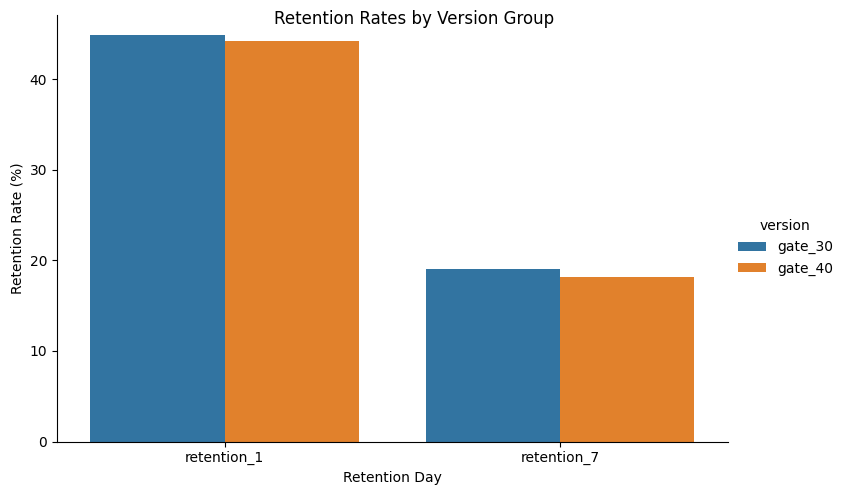

In [ ]:
g = sns.catplot(data=retention_melted, kind='bar',x='Retention Day', y='Retention Rate (%)', hue='version',height=5, aspect=1.5)
g.fig.suptitle("Retention Rates by Version Group")
plt.show()

Although the difference is small, the gate_30 group performs slightly better than gate_40 at both time points, suggesting that setting the gate at level 30 might be more retention-friendly for players.

In [ ]:
df['sum_gamerounds'].describe()

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


Assuming the outliers indeed played that many game rounds, we will retain them in the analysis.

## Correlation

In [ ]:
print(df[['sum_gamerounds', 'retention_1', 'retention_7']].corr())

                sum_gamerounds  retention_1  retention_7
sum_gamerounds        1.000000     0.197603     0.279288
retention_1           0.197603     1.000000     0.327401
retention_7           0.279288     0.327401     1.000000


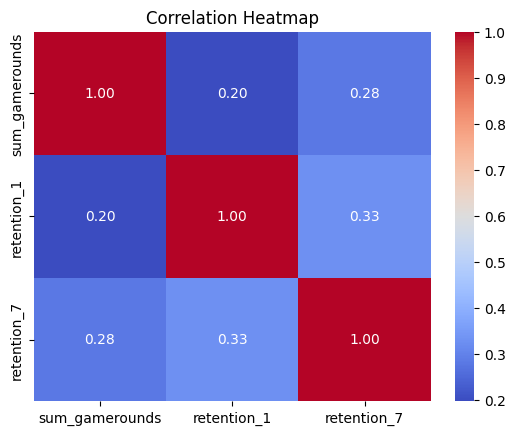

In [ ]:
sns.heatmap(df[['sum_gamerounds', 'retention_1', 'retention_7']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In gate_30, the relationship between the number of game rounds played by users and their retention is weak, indicating that playing more doesn't necessarily mean a higher likelihood of retention.

There is some correlation between Day 1 and Day 7 retention, but it is not particularly strong.

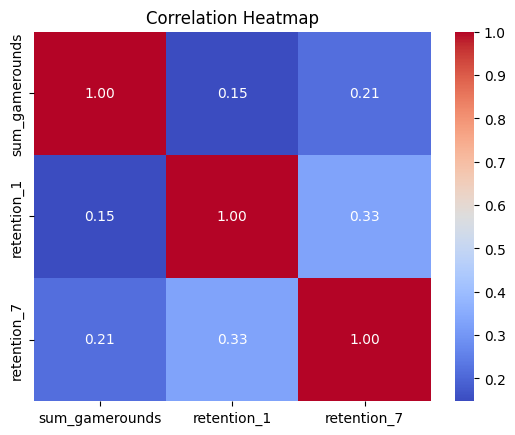

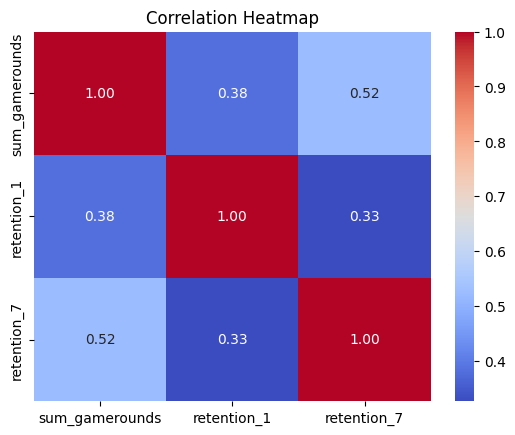

In [ ]:
for version in df['version'].unique():
    sub_df = df[df['version'] == version]
    sns.heatmap(sub_df[['sum_gamerounds', 'retention_1', 'retention_7']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()



In gate_40, users who play more are more likely to be retained.

The correlation between the number of game rounds and 7-day retention reaches 0.52, which indicates a relatively clear trend.

Compared to gate_30, the gate_40 version shows a stronger correlation between user behavior (playing more) and outcome (retention).









## Z-test

In [ ]:
group_a = df[df['version'] == 'gate_30']
group_b = df[df['version'] == 'gate_40']

In [ ]:
group_a.userid.nunique()

44700

In [ ]:
group_b.userid.nunique()

45489

In [ ]:
convert_old = group_a['retention_1'].sum()
convert_new = group_b['retention_1'].sum()
n_old = len(group_a)
n_new= len(group_b)

convert_old, convert_new, n_old, n_new

(np.int64(20034), np.int64(20119), 44700, 45489)

In [ ]:
df.groupby('version')['retention_1'].mean()

,retention_1
version,
gate_30,0.448188
gate_40,0.442283


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

success = [convert_new, convert_old]
nobs = [n_new, n_old]
z_stat, p_val = proportions_ztest(success, nobs, alternative='smaller')

print(f"Z value: {z_stat:.4f}")
print(f"p-value: {p_val*100:.6f}%")

Z value: -1.7841
p-value: 3.720483%


**null:** **$p_{new}$** - **$p_{old}$** >=0

**alternative:** **$p_{new}$** - **$p_{old}$** <:0

Decline the null hypothesis. When the retention is day 1, gate 30 is better than gate 40

In [ ]:
df.groupby('version')['retention_7'].mean()

,retention_7
version,
gate_30,0.190201
gate_40,0.182000


In [ ]:
convert_old = group_a['retention_7'].sum()
convert_new = group_b['retention_7'].sum()

success = [convert_new, convert_old]
nobs = [n_new, n_old]
z_stat, p_val = proportions_ztest(success, nobs, alternative='smaller')

print(f"Z value: {z_stat:.4f}")
print(f"p-value: {p_val*100:.6f}%")

Z value: -3.1644
p-value: 0.077712%


**null:** **$p_{new}$** - **$p_{old}$** >=0

**alternative:** **$p_{new}$** - **$p_{old}$** <:0

Decline the null hypothesis. When the retention is day 7, gate 30 is better than gate 40

## T-test

In [ ]:
#Retention 1
from scipy.stats import ttest_ind

group_a['retention_1'] = group_a['retention_1'].astype(int)
group_b['retention_1'] = group_b['retention_1'].astype(int)

t_stat, p_val = ttest_ind(group_b.iloc[:,3], group_a.iloc[:,3], equal_var=False, alternative='greater')

print(f"T value: {t_stat:.4f}")
print(f"p-value: {p_val*100:.6f}%")

T value: -1.7841
p-value: 96.279278%


null $$H_0: \mu_a \le \mu_b$$
Alternative $$H_1: \mu_a > \mu_b$$

We reject the null hypothesis,
and support the alternative hypothesis:


In [ ]:
#Retention 7
group_a['retention_7'] = group_a['retention_7'].astype(int)
group_b['retention_7'] = group_b['retention_7'].astype(int)

t_stat, p_val = ttest_ind(group_b.iloc[:,4], group_a.iloc[:,4], equal_var=False, alternative='greater')

print(f"T value: {t_stat:.4f}")
print(f"p-value: {p_val*100:.6f}%")

T value: -3.1640
p-value: 99.922173%


null:$$H_0: \mu_a \le \mu_b$$
Alternative $$H_1: \mu_a > \mu_b$$

We reject the null hypothesis,
and support the alternative hypothesis:

## Bootstrapping

In [ ]:
group_a = df[df['version'] == 'gate_30']
group_b = df[df['version'] == 'gate_40']

In [ ]:
boot_1d = []
for i in range(5000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

<Axes: ylabel='Density'>

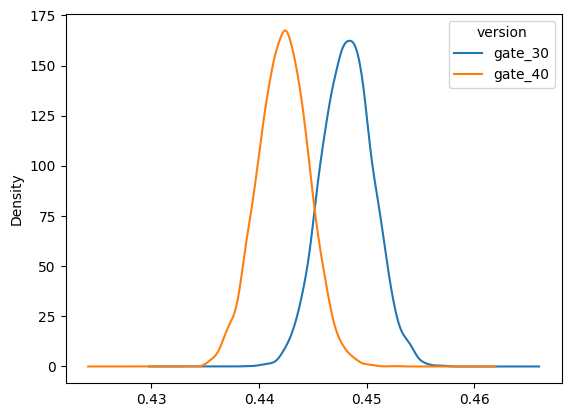

In [ ]:
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

The blue curve is shifted to the right overall, indicating that the bootstrapped average retention rate for gate_30 is higher than that of gate_40.

This aligns with your previous calculation of the mean values (44.82% vs. 44.23%). Although the difference is small, the distributions have minimal overlap, suggesting that the difference might be statistically significant.

Probability that 1-day retention is greater when the gate is at level 30: 0.9622


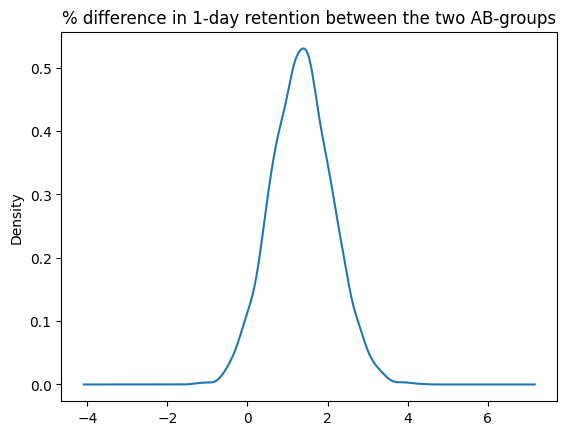

In [ ]:
#Percentage improvement of gate_30 over gate_40
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40) / boot_1d.gate_40*100

ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_1d['diff'] > 0).mean())

The peak is around 1.5%, indicating that most bootstrapping experiments show approximately a 1.5% retention rate improvement for gate_30 compared to gate_40.

The overall distribution lies mostly to the right of 0, with almost no negative values — suggesting a high probability that gate_30 has a higher retention rate.

<Axes: ylabel='Density'>

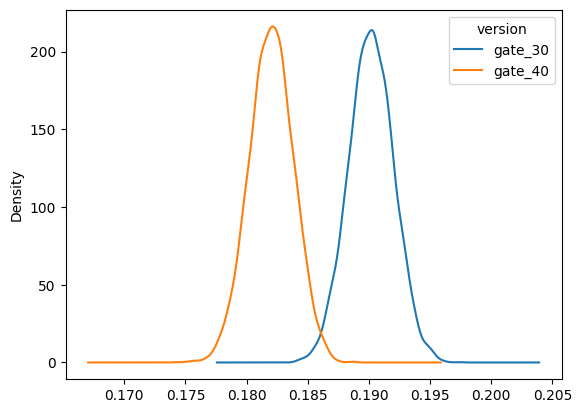

In [ ]:
boot_7d = []
for i in range(5000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)
boot_7d.plot(kind='density')

The overall retention rate of gate_30 is higher than that of gate_40.

The blue curve is shifted to the right and has a higher peak compared to the orange curve.

The two distributions are clearly separated, with very little overlap — suggesting the difference is potentially significant.

Probability that 1-day retention is greater when the gate is at level 30: 0.9994


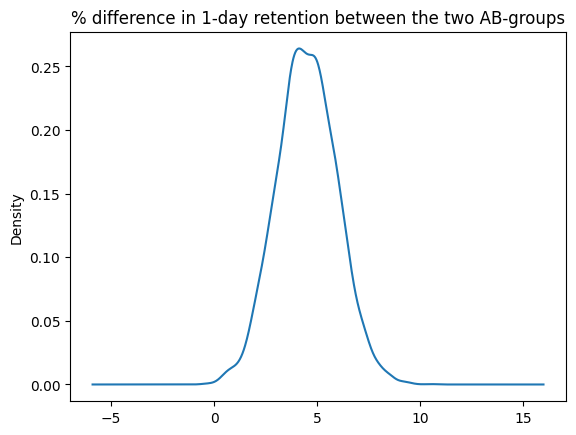

In [ ]:
#Percentage improvement of gate_30 over gate_40
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

print('Probability that 1-day retention is greater when the gate is at level 30:',(boot_7d['diff'] > 0).mean())


**Insights:**
<ul>
    <li><strong>Like with 1-day retention, 7-day retention is slightly lower when the gate is at level 40</strong> (18.2%) than when the gate is at level 30 (19.0%).
    <li><strong>This difference is also larger than for 1-day retention</strong>, presumably because more players have had time to hit the first gate.
    <li> <strong>The overall 7-day retention is lower than the overall 1-day retention</strong>; fewer people play a game a week after installing than a day after installing.
</ul>
<p>But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.</p>

The peak is around +2%, indicating that in most samples, gate_30 has about a 2% higher retention rate than gate_40.

## **Conclusion**


<p>The bootstrap result tells us that <strong>there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40.</strong> The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40.
<p>There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention <em>is</em> one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game.</p>


<p>So, why is retention higher when the gate is positioned earlier? One could expect the opposite: The later the obstacle, the longer people are going to engage with the game. But this is not what the data tells us. The theory of <em>hedonic adaptation</em> can give one explanation for this.
<p>In short, <strong>hedonic adaptation is the tendency for people to get less and less enjoyment out of a fun activity over time if that activity is undertaken continuously.</strong> By forcing players to take a break when they reach a gate, their enjoyment of the game is prolonged. But <strong>when the gate is moved to level 40, fewer players make it far enough, and they are more likely to quit the game because they simply got bored of it. </strong></p>